# This script includes: 

## 1. Import libraries
## 2. Import data
## 3. Data pre-processing
## 4. Run all 4 dendrograms on the scaled data
## 5. Dimensionality Reduction (PCA)
## 6. Re-run all 4 dendrograms on the reduced data
## 7. Comparing the clusters with weather station data
    7.1 Valentia
    7.2 Belgrade
    7.3 Madrid
    7.4 Basel

## 1. Import libraries

In [4]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## 2. Import data

In [6]:
# Import data

path = r'C:\Users\ashle\Documents\10-2024 Climate Analysis'

df = pd.read_csv(os.path.join(path, '02 Data Sets', 'Dataset-weather-prediction-dataset-processed.csv'))

# Import pleasant vs unpleasant data set
df_labels = pd.read_csv(os.path.join(path, '02 Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))


In [7]:
df.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   
2  19600103      1                  8               2.1            0.90   
3  19600104      1                  3               2.1            0.92   
4  19600105      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                 0             0.7  ...                     5   
1                 0             1.1  ...                     7   
2                 0             0.0  ...                     7   
3                 0             4.1  ...                     7   
4                 0             5.4  ...                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                    0.34                    0                4.7   
1                    0.84                    0                0.7   
2                    0.08                    0                0.1   
3                    0.98                    0                0.0   
4                    0.00                    0                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 170 columns]

In [8]:
df_labels.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

## 3. Data pre-processing

In [10]:
# Convert the 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

In [11]:
df.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0 1960-01-01      1                  7               2.1            0.85   
1 1960-01-02      1                  6               2.1            0.84   
2 1960-01-03      1                  8               2.1            0.90   
3 1960-01-04      1                  3               2.1            0.92   
4 1960-01-05      1                  6               2.1            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   
2           1.018                    0.18                 0.30   
3           1.018                    0.58                 0.00   
4           1.018                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                 0             0.7  ...                     5   
1                 0             1.1  ...                     7   
2                 0             0.0  ...                     7   
3                 0             4.1  ...                     7   
4                 0             5.4  ...                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                    0.34                    0                4.7   
1                    0.84                    0                0.7   
2                    0.08                    0                0.1   
3                    0.98                    0                0.0   
4                    0.00                    0                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 170 columns]

In [12]:
# Exclude "DATE" and "MONTH" columns from scaling
df_to_scale = df.drop(columns=['DATE', 'MONTH'])

In [13]:
# Create scaler object using StandardScaler from sklearn.preprocessing
scaler = StandardScaler()

In [14]:
# Create a new dataframe with scaled data
df_scaled = pd.DataFrame(scaler.fit_transform(df_to_scale), columns=df_to_scale.columns)

df_scaled.head()

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
0           0.660514          -0.02793        0.826097       -0.001949   
1           0.244897          -0.02793        0.735760       -0.001949   
2           1.076130          -0.02793        1.277781       -0.001949   
3          -1.001953          -0.02793        1.458455       -0.001949   
4           0.244897          -0.02793        1.729466       -0.001949   

   BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
0               -1.101066            -0.265148         -0.179228   
1               -1.058108             1.658760         -0.179228   
2               -1.251420             0.155707         -0.179228   
3               -0.821838            -0.445514         -0.179228   
4               -0.746661            -0.164944         -0.179228   

   BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  VALENTIA_cloud_cover  \
0       -0.902918        -0.528623       -0.845652  ...             -0.443701   
1       -0.810126        -0.582946       -0.462450  ...              0.783085   
2       -1.065304        -0.257010       -0.186545  ...              0.783085   
3       -0.114186        -0.555784       -0.385810  ...              0.783085   
4        0.187388        -1.003946       -1.075573  ...             -1.670486   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0           0.761754          -1.299744                  -0.806427   
1           1.183580          -1.262455                  -1.042055   
2           1.183580          -0.432779                  -1.136306   
3           0.480538           0.387574                  -1.183432   
4          -0.363113           1.729970                  -0.794645   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0               -0.088407            -0.024706           0.372147   
1                0.503361            -0.024706          -0.829285   
2               -0.396127            -0.024706          -1.009500   
3                0.669056            -0.024706          -1.039536   
4               -0.490810            -0.024706           0.672505   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0           -0.668215          -0.519743          -0.752237  
1           -0.548046          -0.629054          -0.407141  
2           -0.067372           0.054135          -0.177078  
3           -0.998679          -0.164486          -0.838511  
4           -1.509396          -1.339569          -1.471186  

[5 rows x 168 columns]

In [15]:
# Re-add "DATE" and "MONTH" columns back to the scaled dataframe
df_scaled['DATE'] = df['DATE']
df_scaled['MONTH'] = df['MONTH']

df_scaled.head()

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
0           0.660514          -0.02793        0.826097       -0.001949   
1           0.244897          -0.02793        0.735760       -0.001949   
2           1.076130          -0.02793        1.277781       -0.001949   
3          -1.001953          -0.02793        1.458455       -0.001949   
4           0.244897          -0.02793        1.729466       -0.001949   

   BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
0               -1.101066            -0.265148         -0.179228   
1               -1.058108             1.658760         -0.179228   
2               -1.251420             0.155707         -0.179228   
3               -0.821838            -0.445514         -0.179228   
4               -0.746661            -0.164944         -0.179228   

   BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  VALENTIA_pressure  \
0       -0.902918        -0.528623       -0.845652  ...          -1.299744   
1       -0.810126        -0.582946       -0.462450  ...          -1.262455   
2       -1.065304        -0.257010       -0.186545  ...          -0.432779   
3       -0.114186        -0.555784       -0.385810  ...           0.387574   
4        0.187388        -1.003946       -1.075573  ...           1.729970   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_snow_depth  \
0                  -0.806427               -0.088407            -0.024706   
1                  -1.042055                0.503361            -0.024706   
2                  -1.136306               -0.396127            -0.024706   
3                  -1.183432                0.669056            -0.024706   
4                  -0.794645               -0.490810            -0.024706   

   VALENTIA_sunshine  VALENTIA_temp_mean  VALENTIA_temp_min  \
0           0.372147           -0.668215          -0.519743   
1          -0.829285           -0.548046          -0.629054   
2          -1.009500           -0.067372           0.054135   
3          -1.039536           -0.998679          -0.164486   
4           0.672505           -1.509396          -1.339569   

   VALENTIA_temp_max       DATE  MONTH  
0          -0.752237 1960-01-01      1  
1          -0.407141 1960-01-02      1  
2          -0.177078 1960-01-03      1  
3          -0.838511 1960-01-04      1  
4          -1.471186 1960-01-05      1  

[5 rows x 170 columns]

In [16]:
# Select decade to analyze: 2000-2010
df_decade = df_scaled[(df_scaled['DATE'].dt.year >= 2000) & (df_scaled['DATE'].dt.year <= 2010)]

df_decade

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
14610           1.076130         -0.027930        1.187444        1.618161   
14611           1.076130         -0.027930        1.006770        2.107251   
14612          -0.170720         -0.027930        0.464749        2.046115   
14613           0.660514         -0.027930        0.284075        1.251344   
14614          -0.170720         -0.027930        1.277781        1.006799   
...                  ...               ...             ...             ...   
18623           0.660514         -0.846921        0.374412        1.251344   
18624           1.076130          0.518064        0.916434        0.701118   
18625           1.076130         -0.710422        1.910140        0.792822   
18626           1.076130         -1.529413        2.181150        0.945663   
18627           1.076130         -1.529413        2.181150        1.083219   

       BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
14610               -1.229941            -0.385392         -0.179228   
14611               -1.176243            -0.445514         -0.179228   
14612               -0.907754            -0.445514         -0.179228   
14613               -0.768140             0.255911         -0.179228   
14614               -0.897015            -0.305229         -0.179228   
...                       ...                  ...               ...   
18623               -0.961452            -0.445514          7.297641   
18624               -1.208462            -0.285188          6.300726   
18625               -1.229941            -0.445514          5.802268   
18626               -1.305118            -0.445514          3.808436   
18627               -1.305118            -0.445514          2.811520   

       BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  \
14610       -1.065304        -1.017527       -0.723027  ...   
14611       -1.065304        -0.922462       -0.554419  ...   
14612       -0.206978        -1.112591       -0.952948  ...   
14613        0.535359        -0.881720       -0.891636  ...   
14614       -0.206978        -0.596526       -0.385810  ...   
...               ...              ...             ...  ...   
18623       -0.601344        -2.226205       -2.623708  ...   
18624       -1.065304        -1.655817       -1.550743  ...   
18625       -1.065304        -1.316301       -0.983605  ...   
18626       -1.065304        -1.411366       -1.029589  ...   
18627       -1.065304        -1.397785       -1.044917  ...   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
14610           0.863006                  -1.077399               -0.372456   
14611           0.322318                  -1.183432                0.006276   
14612           0.107908                  -1.077399                0.751904   
14613          -0.404813                  -0.912459               -0.088407   
14614          -1.728565                  -1.195214               -0.100243   
...                  ...                        ...                     ...   
18623          -0.003958                  -1.195214               -0.005560   
18624          -0.003958                  -1.195214               -0.005560   
18625          -0.003958                  -1.089181               -0.005560   
18626          -0.003958                  -1.053837               -0.005560   
18627          -0.003958                  -0.959585               -0.005560   

       VALENTIA_snow_depth  VALENTIA_sunshine  VALENTIA_temp_mean  \
14610            -0.024706          -0.829285           -1.239016   
14611            -0.024706          -1.039536           -0.337751   
14612            -0.024706          -0.679106           -0.638173   
14613            -0.024706           0.011717           -0.788384   
14614            -0.024706          -1.039536           -0.908552   
...                    ...                ...                 ...   
18623           

In [17]:
# Remove non-numeric columns (e.g., DATE, MONTH)

df_numeric = df_decade.drop(columns=['DATE', 'MONTH'])

## 4. Run all 4 dendrograms on the scaled data

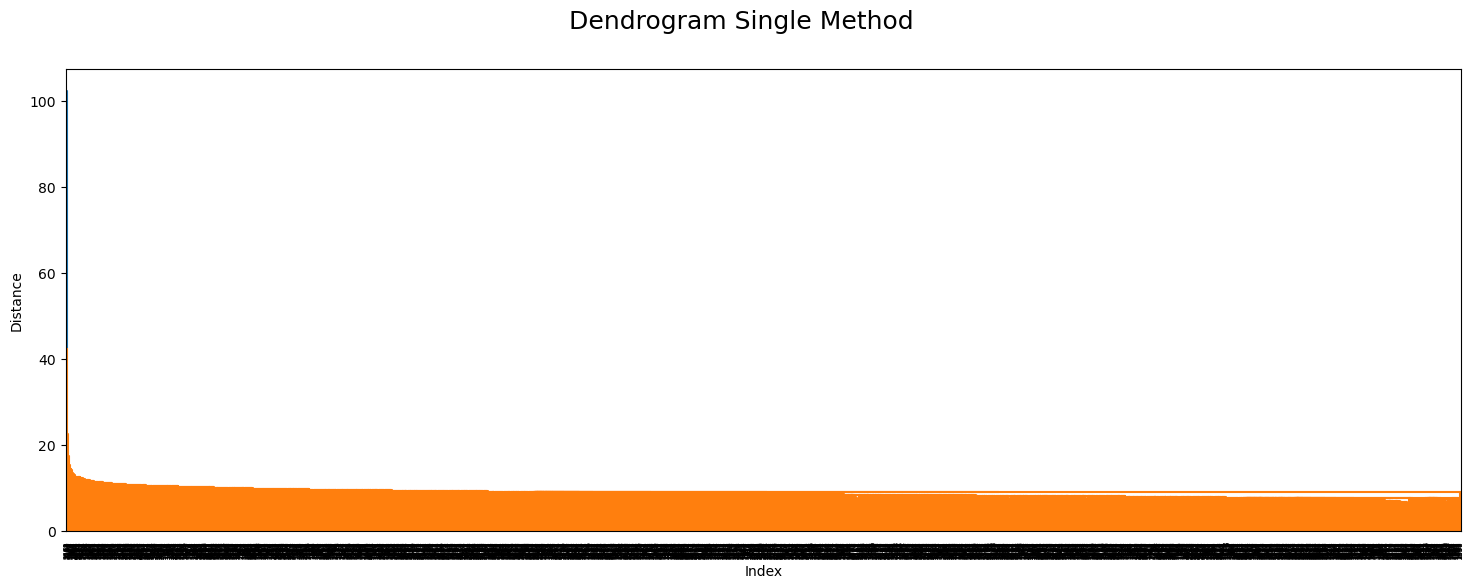

In [19]:
# Run the clustering model

distance_single = linkage(df_numeric,method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

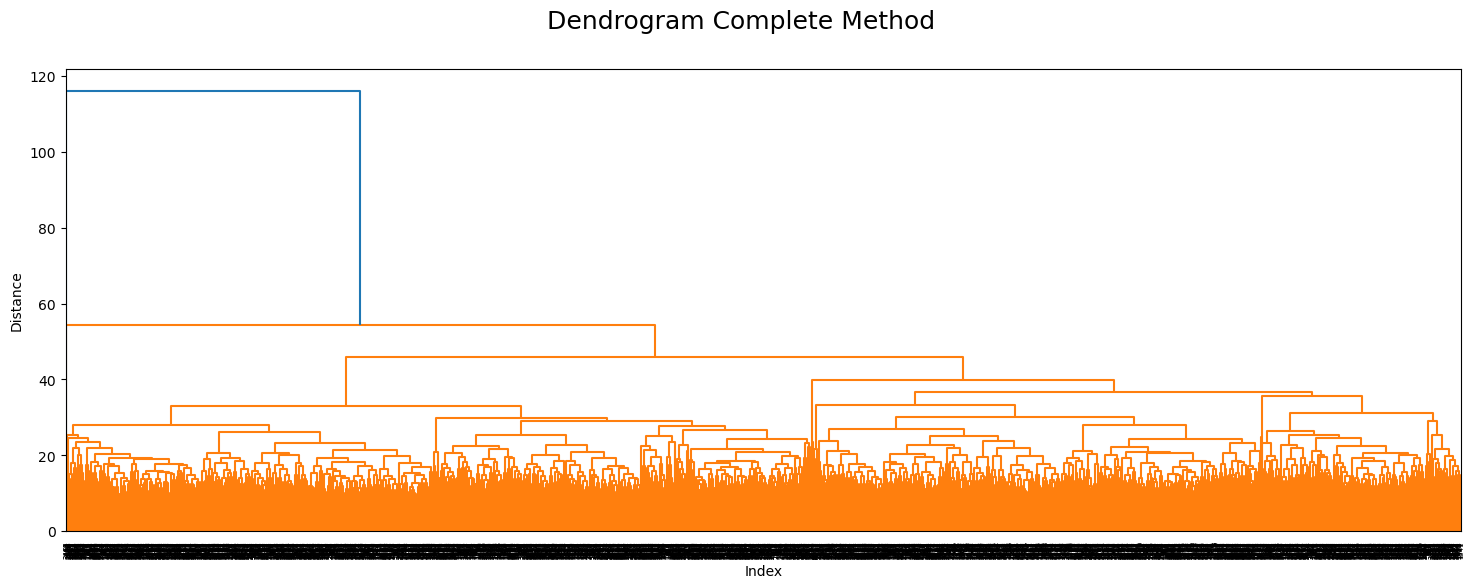

In [20]:
# Run the clustering model

distance_complete = linkage(df_numeric,method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

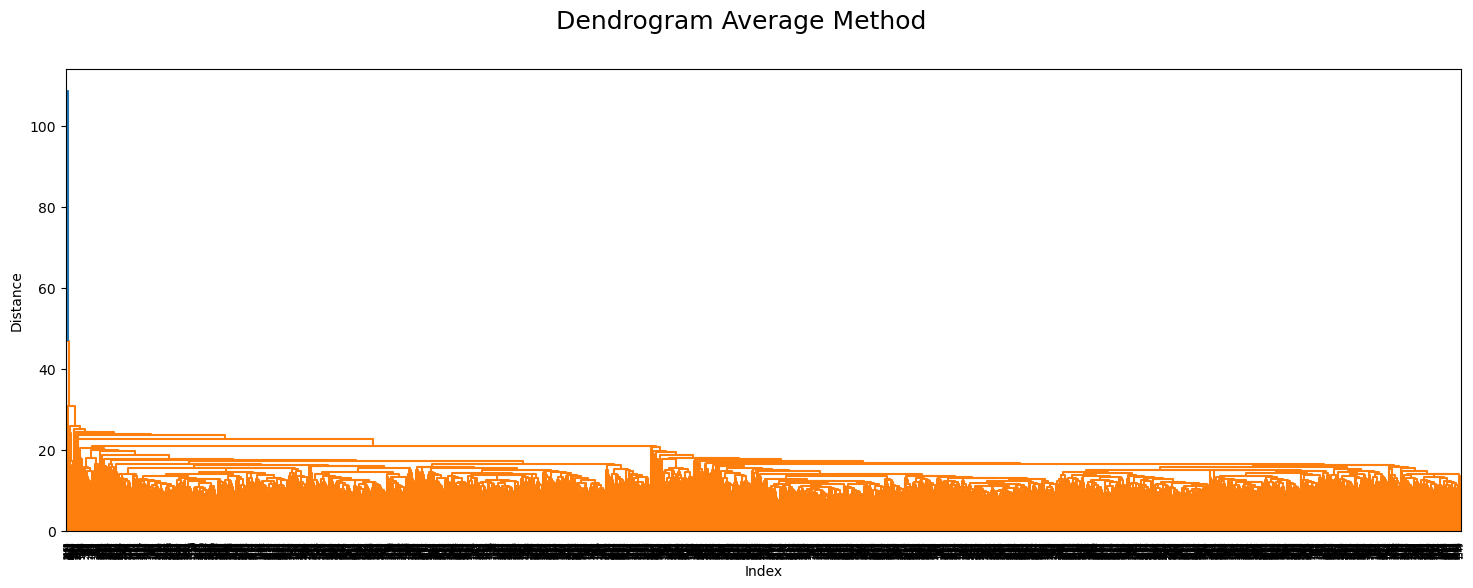

In [21]:
# Run the clustering model

distance_average = linkage(df_numeric,method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

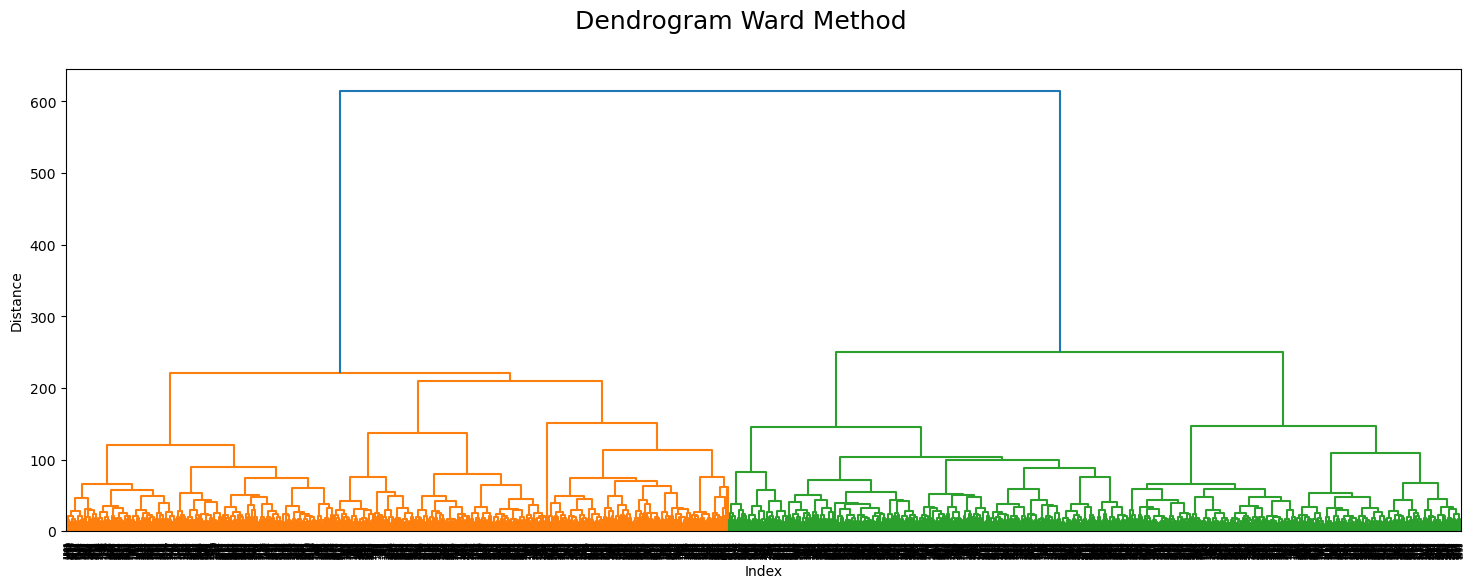

In [22]:
# Run the clustering model

distance_ward = linkage(df_numeric,method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

## 5. Dimensionality Reduction (PCA)

In [24]:
# Run the PCA model, reducing to 18 components
pca = PCA(n_components=18)
principalComponents = pca.fit_transform(df_numeric)

In [25]:
principalComponents

array([[-10.23975464,   5.20650638,  -5.60436586, ...,   0.04726082,
          1.92879258,   0.54727169],
       [ -9.78294363,   5.70186373,  -5.08878836, ...,  -0.27652053,
          1.6683574 ,   0.64570208],
       [ -9.78263922,   4.9620631 ,  -6.55322163, ...,  -0.87373234,
         -0.66455874,   0.8289012 ],
       ...,
       [-12.2370591 ,   3.7670292 ,  -0.91363801, ...,   3.69105359,
          1.31751058,   6.87962763],
       [-12.29254771,   5.52515879,   0.14366685, ...,   1.79504162,
          0.77548509,   5.22475992],
       [-12.62534695,   4.02102407,  -2.29128636, ...,   0.88734415,
          0.08142687,   4.86778455]])

In [26]:
# Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'PCA17', 'PCA18'], index=df_numeric.index)

In [27]:
dfPCA

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
14610 -10.239755  5.206506 -5.604366 -2.671504  2.932465 -1.294911  0.813398   
14611  -9.782944  5.701864 -5.088788 -3.399508  0.134314 -0.284409  1.445521   
14612  -9.782639  4.962063 -6.553222 -1.181968 -2.424981  1.147682  1.112714   
14613  -8.384295  3.434747 -6.672519  0.634649 -1.186666  1.139606  0.823262   
14614  -9.191103  4.391758 -2.512762  0.109182 -3.290011 -0.867204  3.413491   
...          ...       ...       ...       ...       ...       ...       ...   
18623 -13.722389  4.482521 -0.225156  0.765096  4.950273 -3.285558 -0.181478   
18624 -12.864112  3.765892 -0.217446  0.740063  3.670177 -3.541880 -0.130428   
18625 -12.237059  3.767029 -0.913638 -0.870323  4.135057 -4.259424 -0.622204   
18626 -12.292548  5.525159  0.143667 -0.606337  2.380073 -5.216459  0.719749   
18627 -12.625347  4.021024 -2.291286 -1.247840  2.472481 -4.430276 -0.270867   

           PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
14610 -1.070080  0.205692 -0.081822 -0.376060 -0.473368 -1.549171  1.168168   
14611 -0.339222 -0.964346  0.110251 -0.910176  0.800266 -1.146733 -0.362540   
14612 -0.608820  0.209745  0.524065  0.541518  2.608963 -1.288317  0.280972   
14613 -2.626276 -0.214464  4.969832  0.591329  0.094541 -0.094802  0.041407   
14614 -1.909325  1.066843  0.613539 -0.341368 -2.270874 -0.999870  0.816999   
...         ...       ...       ...       ...       ...       ...       ...   
18623  0.854123 -1.389672  1.299764  0.177063 -0.439831 -2.515311  0.813871   
18624  0.457835  0.142351  1.140585 -1.702481 -0.870601 -1.954135  1.334749   
18625  0.298827  0.078457  0.560528 -0.879709 -0.991944 -1.839457  1.430872   
18626 -0.988652  0.459021  0.513465 -0.493245 -1.503055  0.154372  1.735633   
18627 -1.056946 -0.235051  1.300846  0.552786 -0.549663 -0.236815  0.594744   

          PCA15     PCA16     PCA17     PCA18  
14610 -0.060124  0.047261  1.928793  0.547272  
14611 -0.397961 -0.276521  1.668357  0.645702  
14612 -0.145492 -0.873732 -0.664559  0.828901  
14613  3.097945 -1.388780 -0.948374 -0.945719  
14614  0.141141 -1.494358  0.726874 -0.837767  
...         ...       ...       ...       ...  
18623  3.937709  3.890943  0.674165  7.945359  
18624  2.991469  4.689208  0.647905  7.774977  
18625  2.318769  3.691054  1.317511  6.879628  
18626  2.907350  1.795042  0.775485  5.224760  
18627  2.439891  0.887344  0.081427  4.867785  

[4018 rows x 18 columns]

In [28]:
# Export reduced data for future use
dfPCA.to_csv('weather_data_scaled_reduced.csv', index=False)

## 6. Re-run all 4 dendrograms on the reduced data

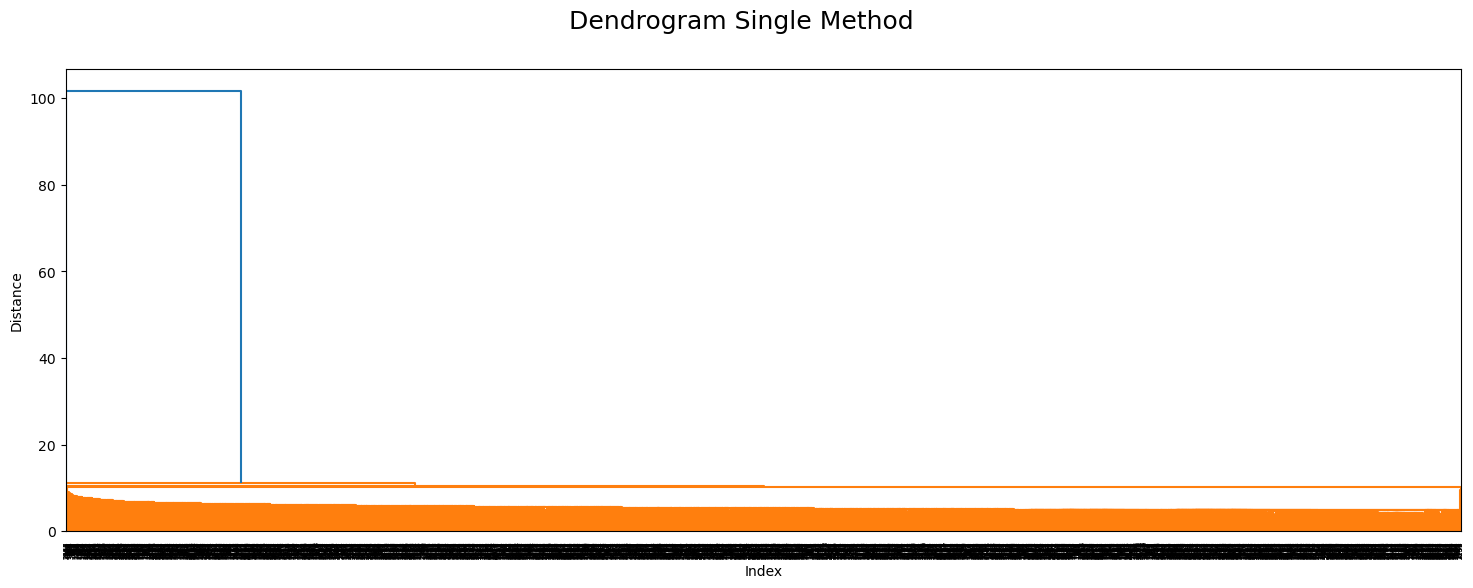

In [30]:
# Run the clustering model on reduced data

distance_single = linkage(dfPCA,method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

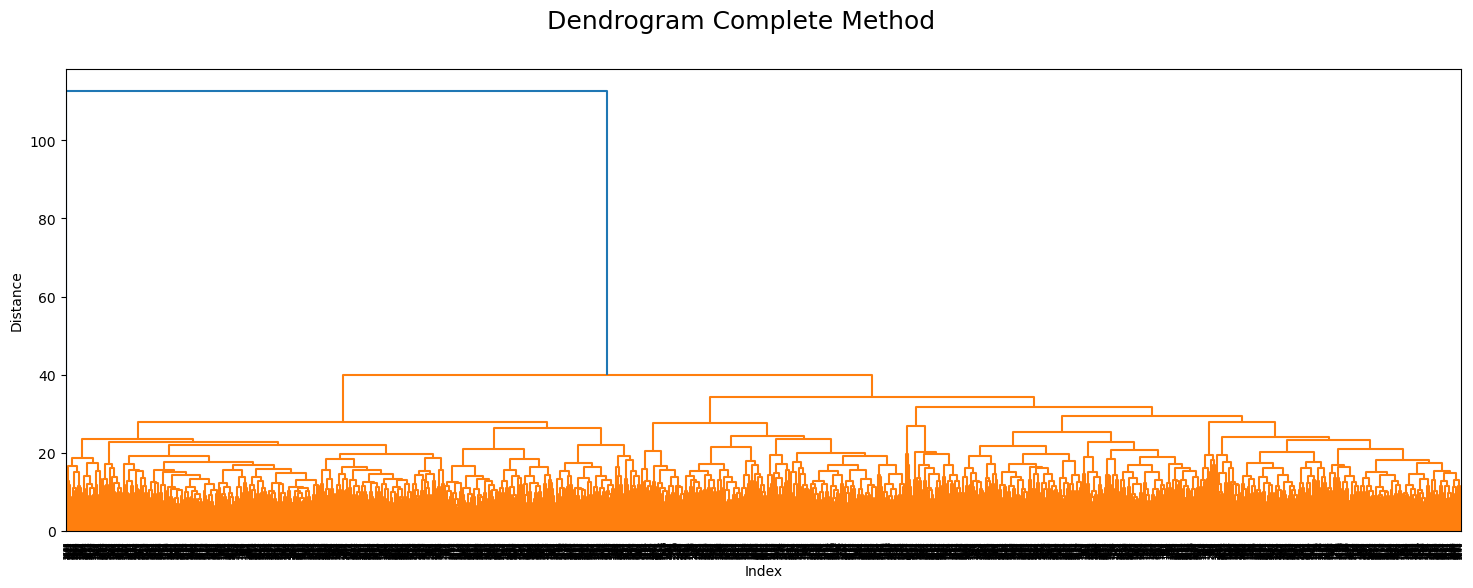

In [31]:
# Run the clustering model on reduced data

distance_complete = linkage(dfPCA,method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

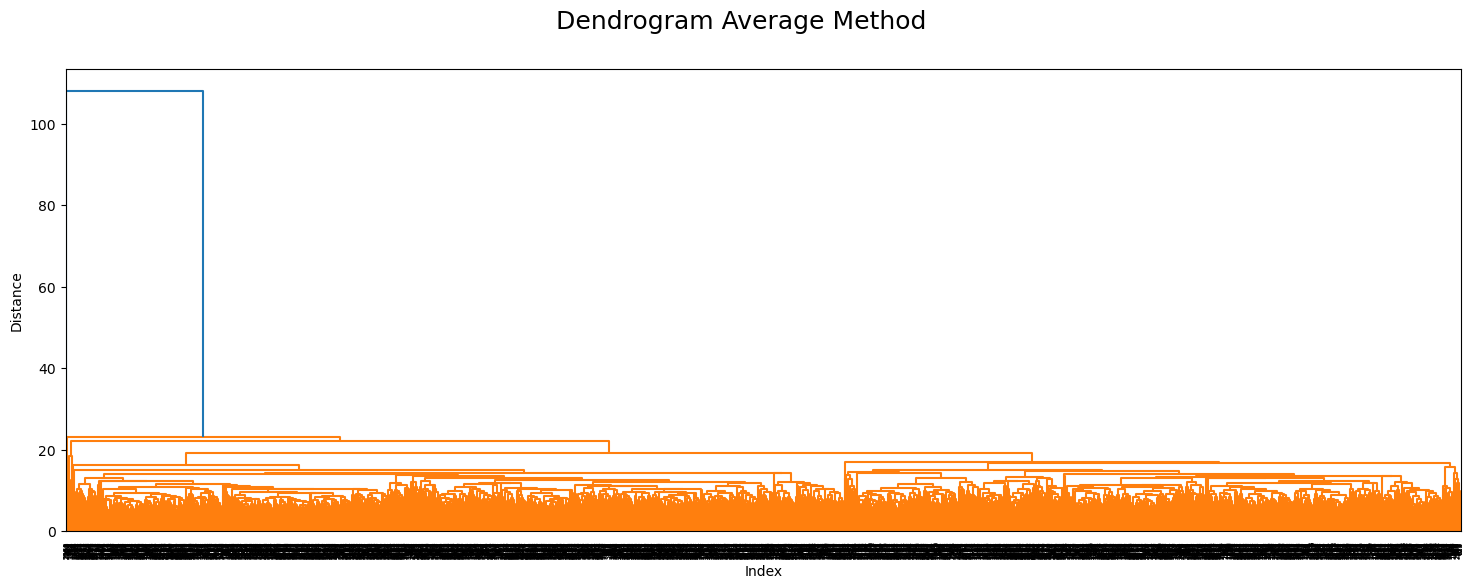

In [32]:
# Run the clustering model on reduced data

distance_average = linkage(dfPCA,method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

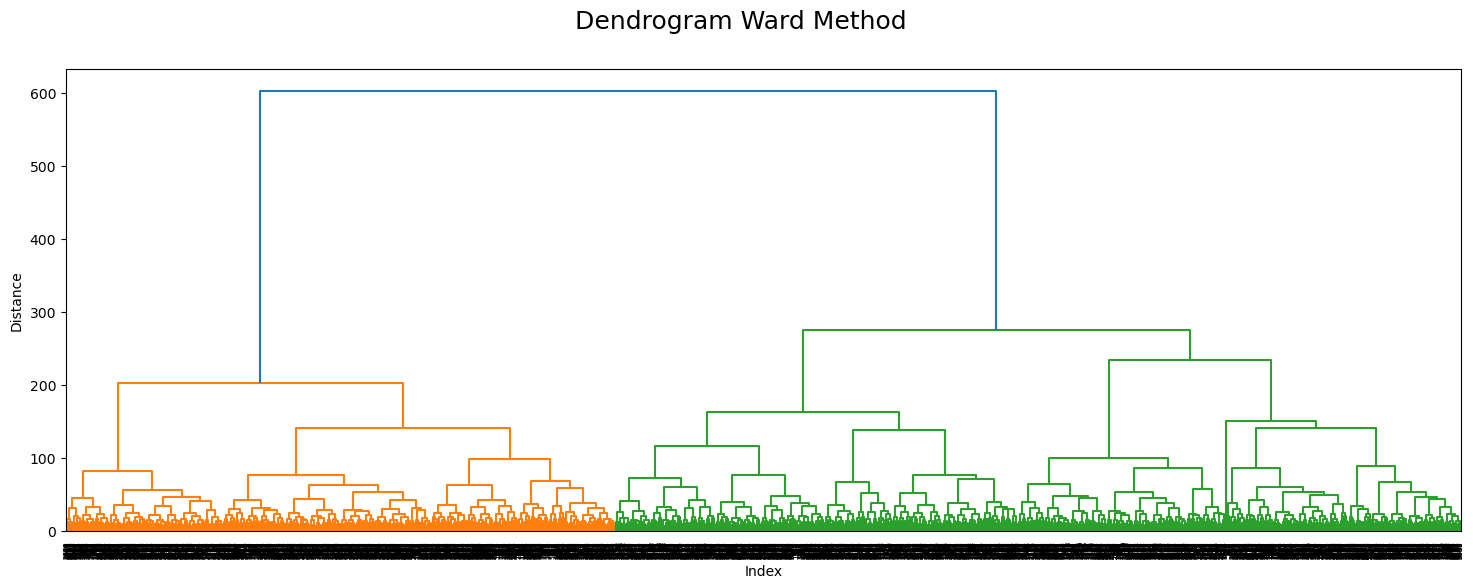

In [33]:
# Run the clustering model on reduced data

distance_ward = linkage(dfPCA,method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

## 7. Comparing the clusters with weather station data

In [35]:
# Extract cluster labels
dfPCA['cluster'] = fcluster(distance_ward, 2, criterion='maxclust')

dfPCA.head()

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
14610 -10.239755  5.206506 -5.604366 -2.671504  2.932465 -1.294911  0.813398   
14611  -9.782944  5.701864 -5.088788 -3.399508  0.134314 -0.284409  1.445521   
14612  -9.782639  4.962063 -6.553222 -1.181968 -2.424981  1.147682  1.112714   
14613  -8.384295  3.434747 -6.672519  0.634649 -1.186666  1.139606  0.823262   
14614  -9.191103  4.391758 -2.512762  0.109182 -3.290011 -0.867204  3.413491   

           PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
14610 -1.070080  0.205692 -0.081822 -0.376060 -0.473368 -1.549171  1.168168   
14611 -0.339222 -0.964346  0.110251 -0.910176  0.800266 -1.146733 -0.362540   
14612 -0.608820  0.209745  0.524065  0.541518  2.608963 -1.288317  0.280972   
14613 -2.626276 -0.214464  4.969832  0.591329  0.094541 -0.094802  0.041407   
14614 -1.909325  1.066843  0.613539 -0.341368 -2.270874 -0.999870  0.816999   

          PCA15     PCA16     PCA17     PCA18  cluster  
14610 -0.060124  0.047261  1.928793  0.547272        2  
14611 -0.397961 -0.276521  1.668357  0.645702        2  
14612 -0.145492 -0.873732 -0.664559  0.828901        2  
14613  3.097945 -1.388780 -0.948374 -0.945719        2  
14614  0.141141 -1.494358  0.726874 -0.837767        2

<Axes: title={'center': 'K = 2'}, xlabel='PCA1', ylabel='PCA2'>

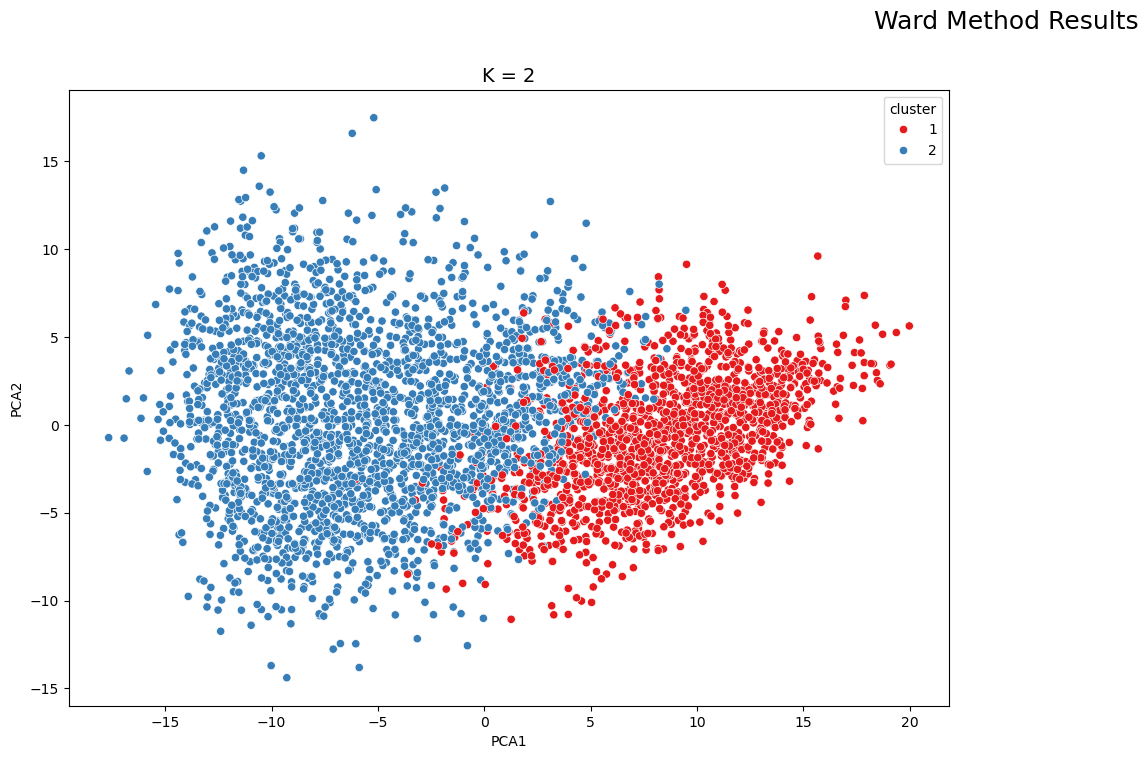

In [36]:
#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle('Ward Method Results',fontsize=18)

plt.subplot(1,2,1)
plt.title('K = 2',fontsize=14)
sns.scatterplot(x='PCA1',y='PCA2', data=dfPCA, hue='cluster', palette='Set1')

In [37]:
# Add the weather station columns to dfPCA
dfPCA['VALENTIA_pleasant_weather'] = df_labels['VALENTIA_pleasant_weather']
dfPCA['BELGRADE_pleasant_weather'] = df_labels['BELGRADE_pleasant_weather']
dfPCA['MADRID_pleasant_weather'] = df_labels['MADRID_pleasant_weather']
dfPCA['BASEL_pleasant_weather'] = df_labels['BASEL_pleasant_weather']

In [38]:
dfPCA.head(10)

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
14610 -10.239755  5.206506 -5.604366 -2.671504  2.932465 -1.294911  0.813398   
14611  -9.782944  5.701864 -5.088788 -3.399508  0.134314 -0.284409  1.445521   
14612  -9.782639  4.962063 -6.553222 -1.181968 -2.424981  1.147682  1.112714   
14613  -8.384295  3.434747 -6.672519  0.634649 -1.186666  1.139606  0.823262   
14614  -9.191103  4.391758 -2.512762  0.109182 -3.290011 -0.867204  3.413491   
14615  -8.400858  4.378616 -5.417494  0.604836 -1.795469 -0.194241  2.712145   
14616  -9.262875  4.215562 -4.426078 -1.686148 -3.019147  0.408776  2.344546   
14617  -9.466271  3.287192 -2.737141 -0.847833 -4.569853  0.991811 -0.196759   
14618 -11.596799  3.579251  0.977413 -4.732155 -4.804038  0.140516 -1.331978   
14619 -11.389629  6.545619 -1.621676 -6.798440 -1.256212  0.093134 -0.517847   

           PCA8      PCA9     PCA10  ...     PCA14     PCA15     PCA16  \
14610 -1.070080  0.205692 -0.081822  ...  1.168168 -0.060124  0.047261   
14611 -0.339222 -0.964346  0.110251  ... -0.362540 -0.397961 -0.276521   
14612 -0.608820  0.209745  0.524065  ...  0.280972 -0.145492 -0.873732   
14613 -2.626276 -0.214464  4.969832  ...  0.041407  3.097945 -1.388780   
14614 -1.909325  1.066843  0.613539  ...  0.816999  0.141141 -1.494358   
14615 -2.653079 -0.455596  1.304641  ...  1.171713  0.588777 -1.225875   
14616 -0.838722 -0.763468  1.469439  ...  0.751803  0.236514 -1.228253   
14617 -1.637990 -0.972980  2.381394  ... -0.864570  1.042573 -1.630157   
14618 -1.975085  1.728893  0.988119  ... -0.378382  1.595249 -1.433010   
14619  0.275566  1.022616  0.733222  ...  0.283253 -0.321892  0.612816   

          PCA17     PCA18  cluster  VALENTIA_pleasant_weather  \
14610  1.928793  0.547272        2                          0   
14611  1.668357  0.645702        2                          0   
14612 -0.664559  0.828901        2                          0   
14613 -0.948374 -0.945719        2                          0   
14614  0.726874 -0.837767        2                          0   
14615 -1.665372  0.109939        2                          0   
14616 -0.426864  0.396547        2                          0   
14617 -0.176667  0.725414        2                          0   
14618  1.473644 -0.013571        2                          0   
14619  1.279488 -1.618854        2                          0   

       BELGRADE_pleasant_weather  MADRID_pleasant_weather  \
14610                          0                        0   
14611                          0                        0   
14612                          0                        0   
14613                          0                        0   
14614                          0                        0   
14615                          0                        0   
14616                          0                        0   
14617                          0                        0   
14618                          0                        0   
14619                          0                        0   

       BASEL_pleasant_weather  
14610                       0  
14611                       0  
14612                       0  
14613                       0  
14614                       0  
14615                       0  
14616                       0  
14617                       0  
14618                       0  
14619                       0  

[10 rows x 23 columns]

### 7.1 Valentia

Text(0.5, 0.98, 'PCA Ward Method Results with Valentia')

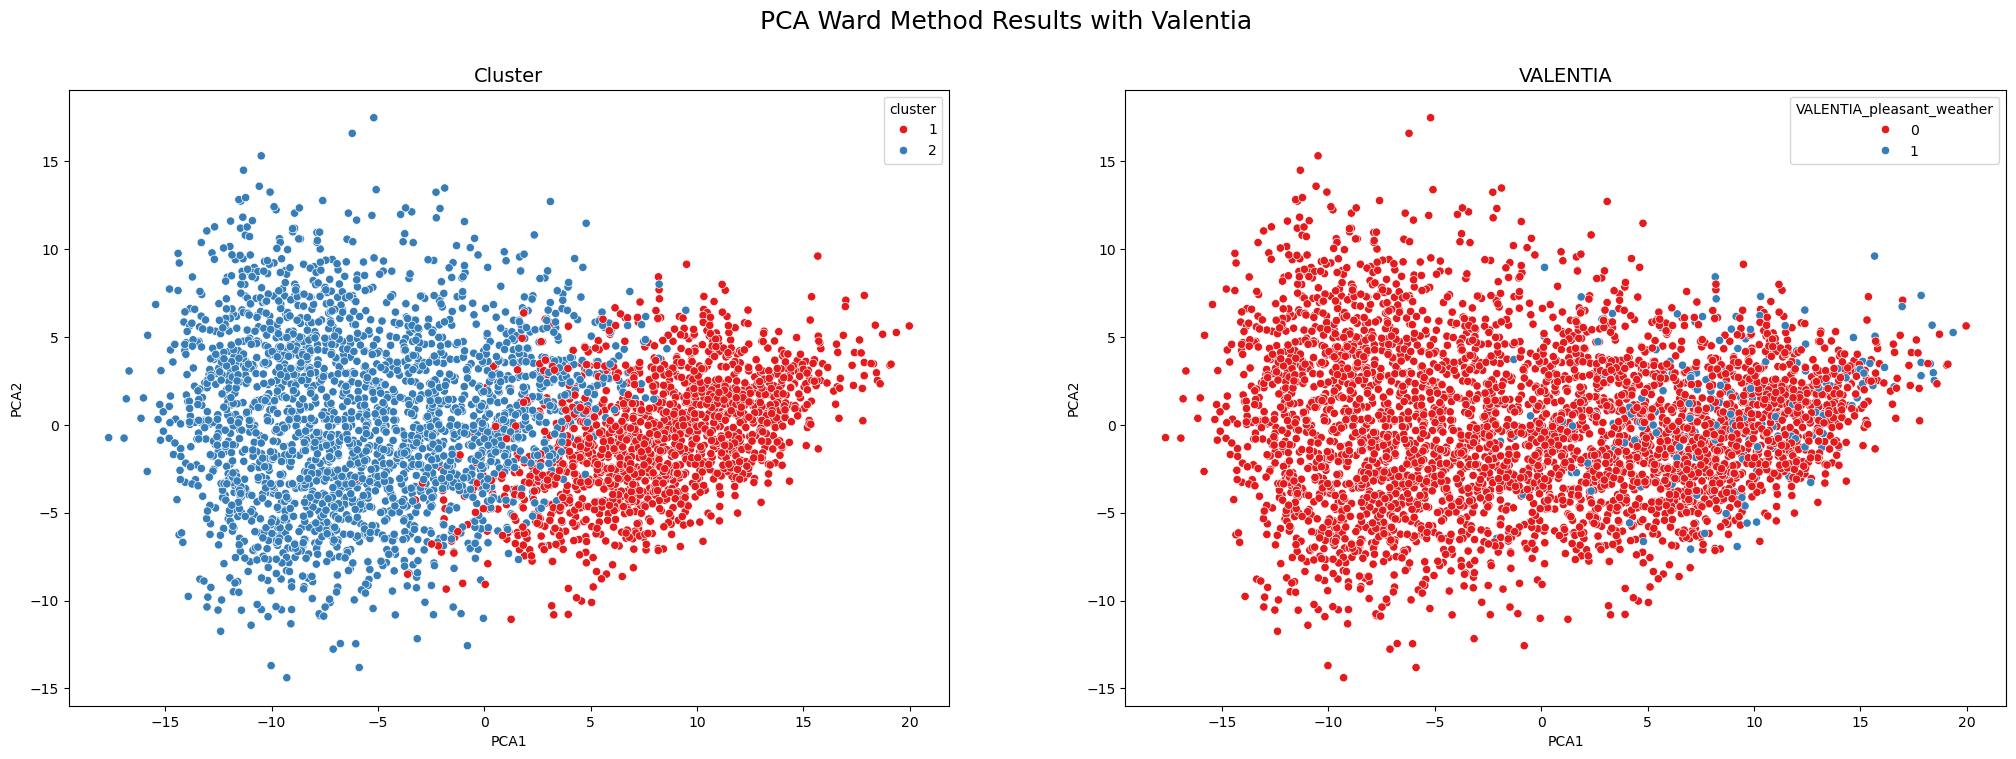

In [40]:
plt.figure(figsize=(25,8))

# Plot for Clusters
plt.subplot(1, 2, 1)
plt.title('Cluster', fontsize=14)
sns.scatterplot(x='PCA1', y='PCA2', data=dfPCA, hue='cluster', palette='Set1')

# Plot for VALENTIA
plt.subplot(1, 2, 2)
plt.title('VALENTIA', fontsize=14)
sns.scatterplot(x='PCA1', y='PCA2', data=dfPCA, hue='VALENTIA_pleasant_weather', palette='Set1')

plt.suptitle('PCA Ward Method Results with Valentia', fontsize=18)


### 7.2 Belgrade

Text(0.5, 0.98, 'PCA Ward Method Results with BELGRADE')

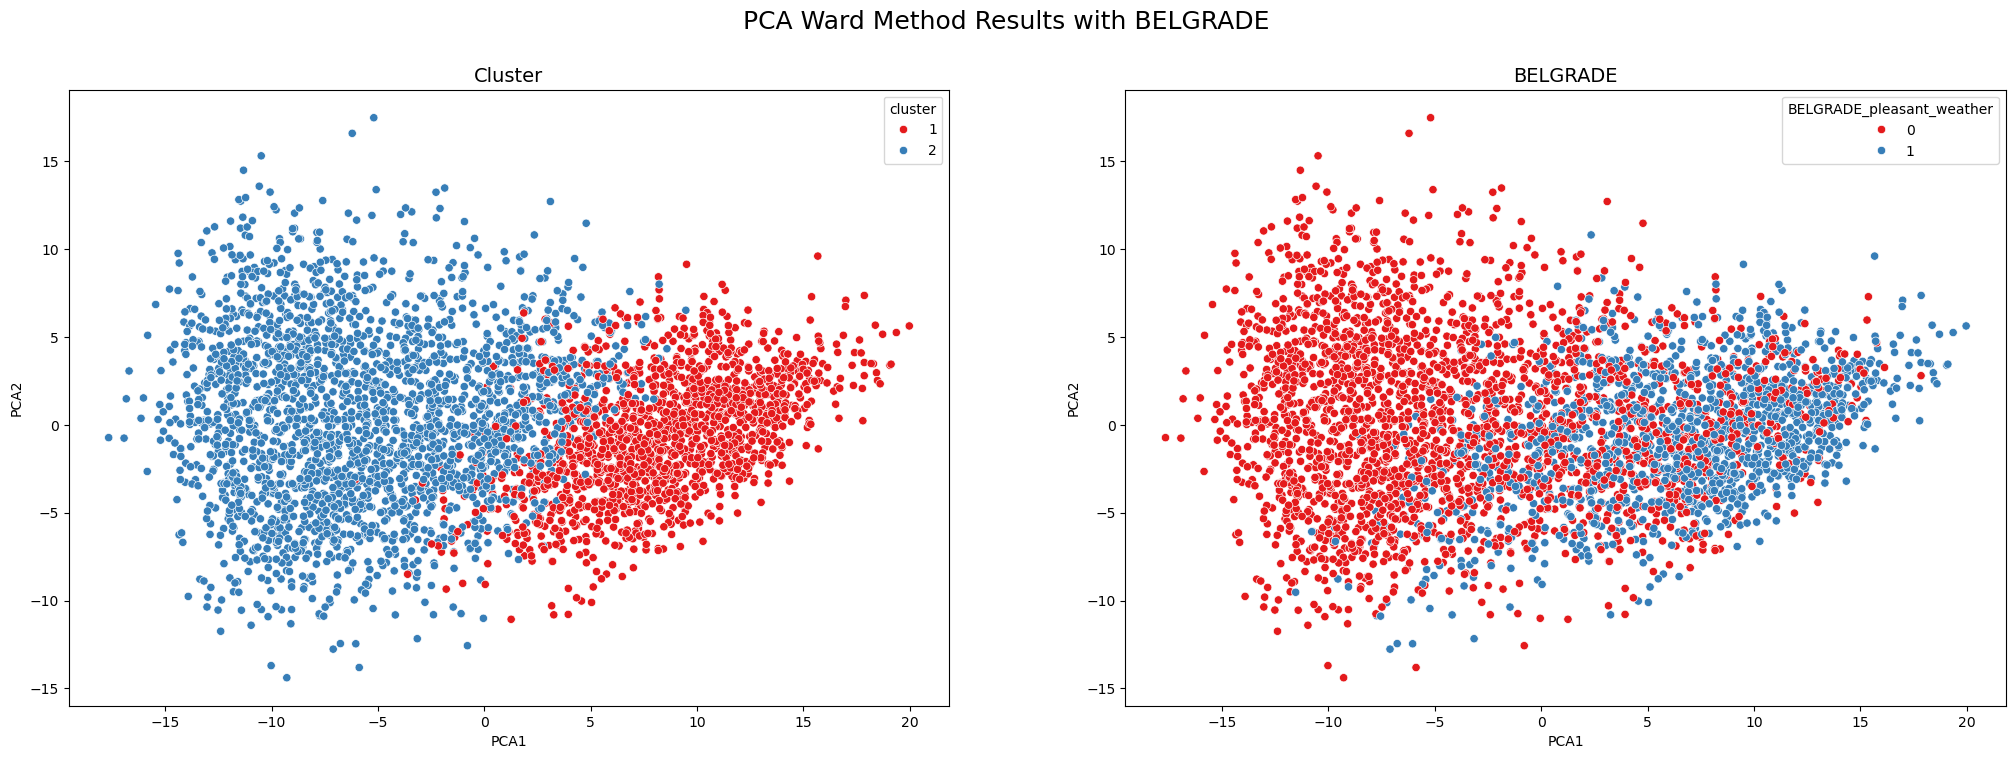

In [42]:
plt.figure(figsize=(25,8))

# Plot for clusters
plt.subplot(1, 2, 1)
plt.title('Cluster', fontsize=14)
sns.scatterplot(x='PCA1', y='PCA2', data=dfPCA, hue='cluster', palette='Set1')

# Plot for BELGRADE
plt.subplot(1, 2, 2)
plt.title('BELGRADE', fontsize=14)
sns.scatterplot(x='PCA1', y='PCA2', data=dfPCA, hue='BELGRADE_pleasant_weather', palette='Set1')

plt.suptitle('PCA Ward Method Results with BELGRADE', fontsize=18)

### 7.3 Madrid

Text(0.5, 0.98, 'PCA Ward Method Results with MADRID')

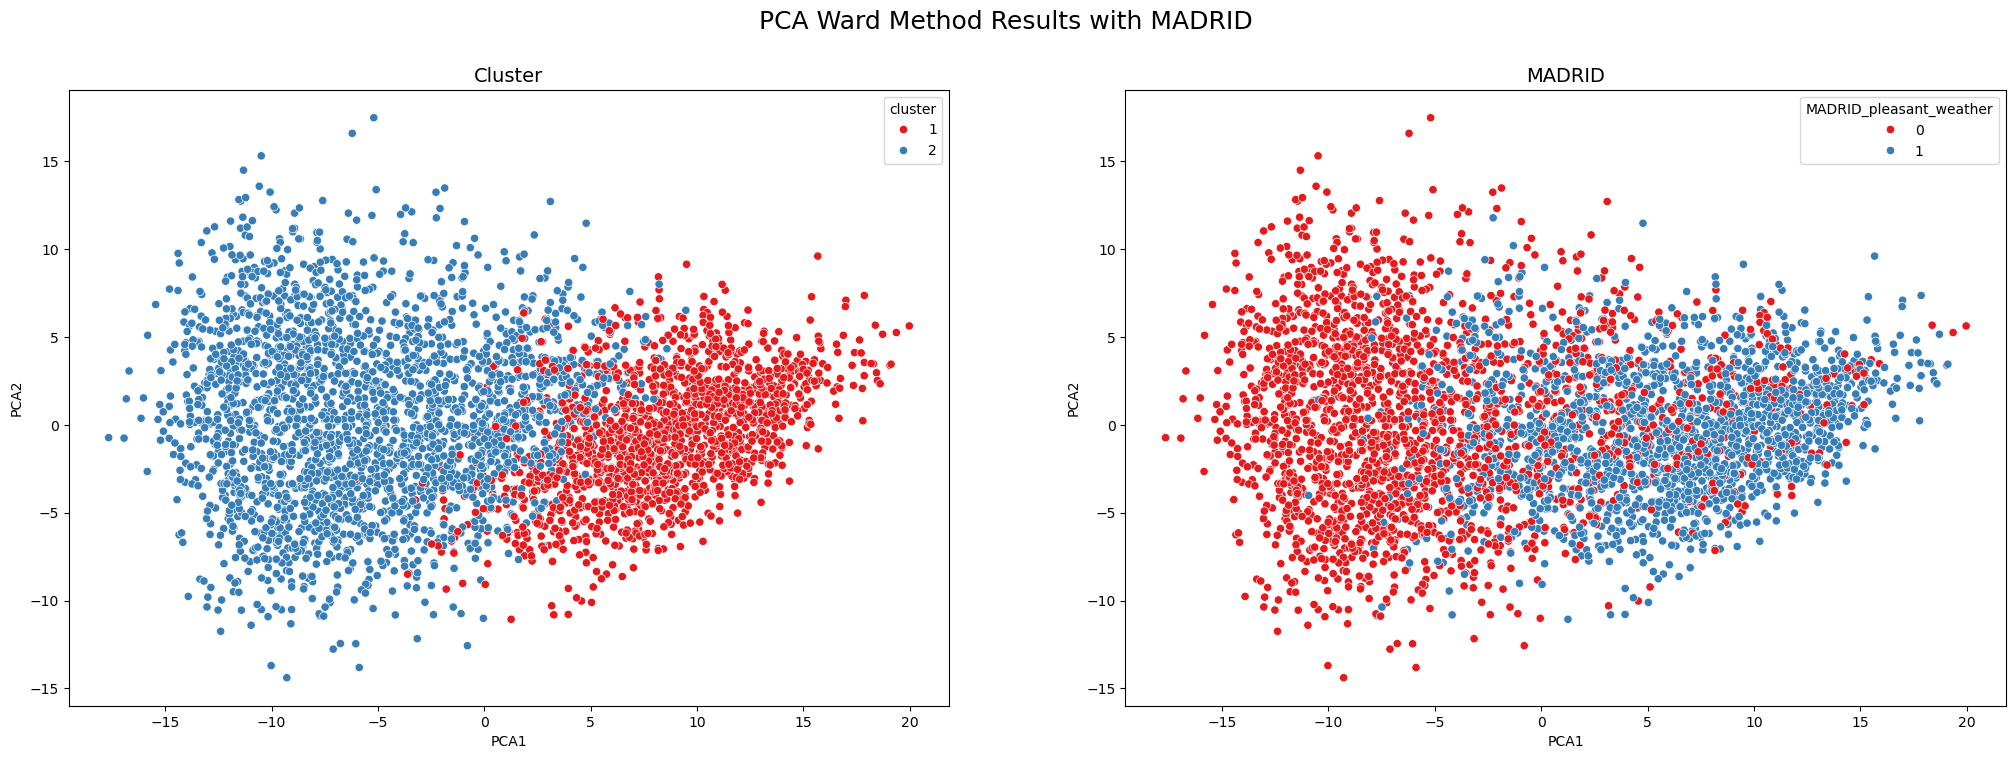

In [44]:
plt.figure(figsize=(25,8))

# Plot for clusters
plt.subplot(1, 2, 1)
plt.title('Cluster', fontsize=14)
sns.scatterplot(x='PCA1', y='PCA2', data=dfPCA, hue='cluster', palette='Set1')

# Plot for MADRID
plt.subplot(1, 2, 2)
plt.title('MADRID', fontsize=14)
sns.scatterplot(x='PCA1', y='PCA2', data=dfPCA, hue='MADRID_pleasant_weather', palette='Set1')

plt.suptitle('PCA Ward Method Results with MADRID', fontsize=18)

### 7.4 Basel

Text(0.5, 0.98, 'PCA Ward Method Results with BASEL')

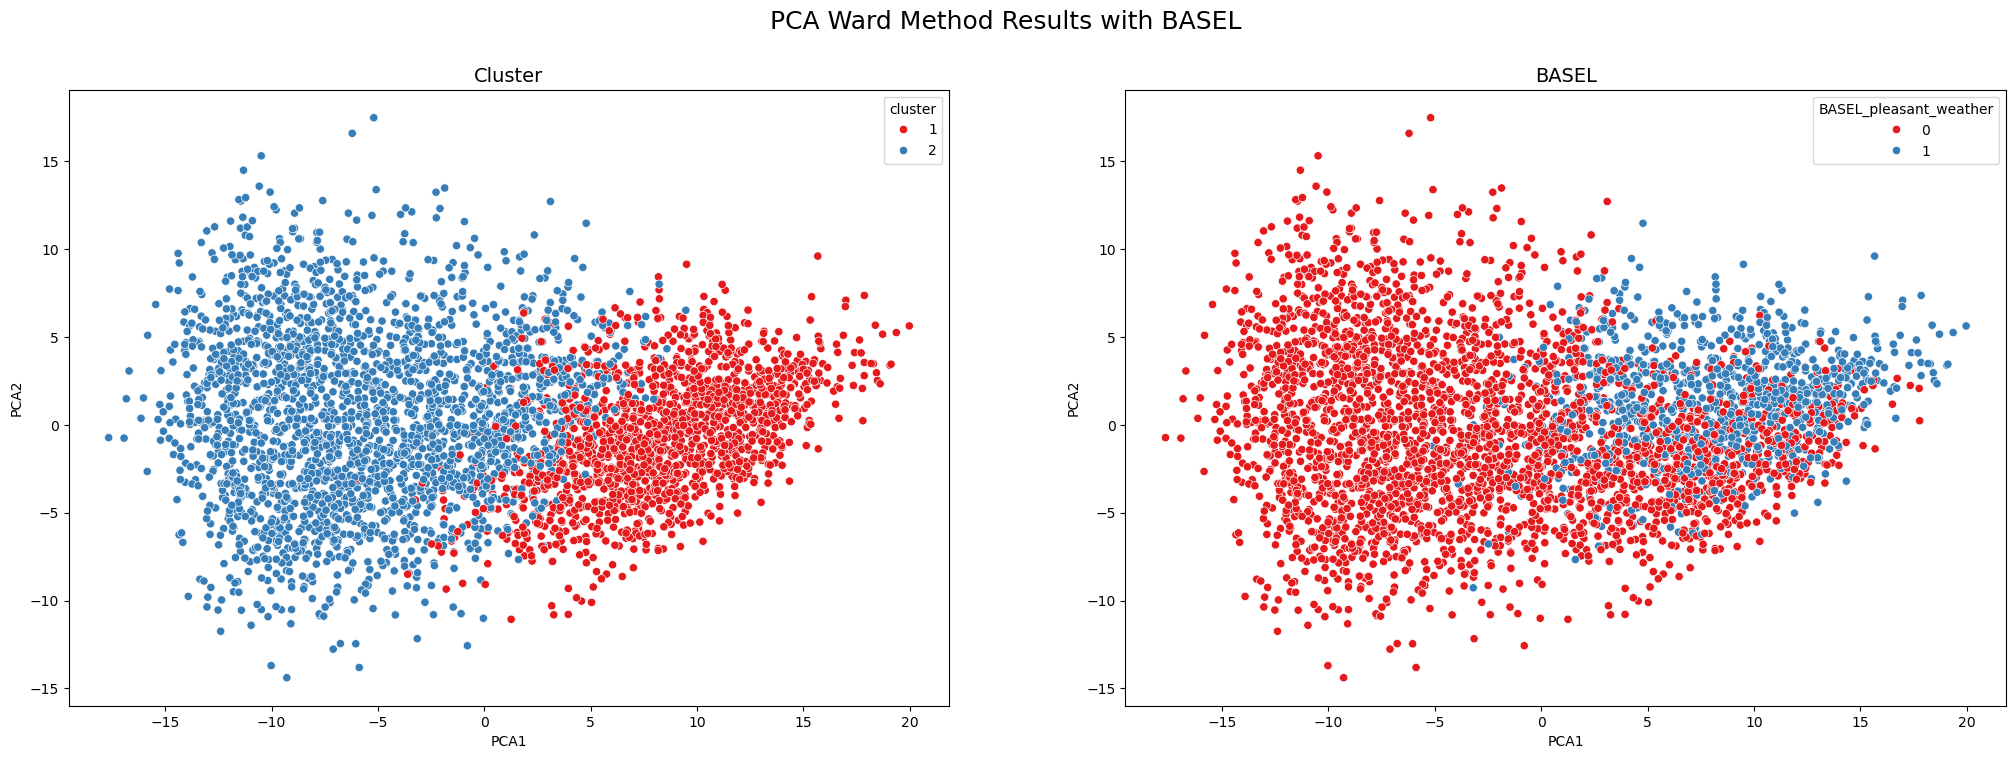

In [46]:
plt.figure(figsize=(25,8))

# Plot for clusters
plt.subplot(1, 2, 1)
plt.title('Cluster', fontsize=14)
sns.scatterplot(x='PCA1', y='PCA2', data=dfPCA, hue='cluster', palette='Set1')

# Plot for BASEL
plt.subplot(1, 2, 2)
plt.title('BASEL', fontsize=14)
sns.scatterplot(x='PCA1', y='PCA2', data=dfPCA, hue='BASEL_pleasant_weather', palette='Set1')

plt.suptitle('PCA Ward Method Results with BASEL', fontsize=18)